## Part1: For this project, you should look at requests with Request Type of "COVID-19" and Subrequest Type of "COVID-19 Violations". 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import requests

%matplotlib inline

In [2]:
# to see all columns
pd.set_option('display.max_columns', None)

### Using the csv file:

In [3]:
#hubNash = pd.read_csv("../data/hubNashville__311__Service_Requests.csv")

In [4]:
#covid19 = hubNash[(hubNash["Request Type"] == "COVID-19") & hubNash["Subrequest Type"].str.contains("COVID-19 Violations")]

### Using Json files:

In [5]:
#getting data from API, case_requests = COVID-19 and setting limit to 25k

url = 'https://data.nashville.gov/resource/7qhx-rexh.json?case_request=COVID-19&$limit=25000'

response = requests.get(url)

In [6]:
#reading the json text to dataframe

hubNashville = pd.read_json(response.text)

In [7]:
#subsetting for case_request and case_subrequest

covid19 = hubNashville[hubNashville["case_subrequest"] == "COVID-19 Violations"]

In [8]:
covid19.shape

(11676, 19)

In [9]:
covid19.head()

,additional_subrequest,case_number,case_origin,case_request,case_subrequest,closed_when_created,contact_type,date_time_closed,date_time_opened,incident_address,incident_city,incident_council_district,incident_zip_code,latitude,longitude,mapped_location,parent_case,state_issue,status
1,COVID-19 Violations,497626,hubNashville Community,COVID-19,COVID-19 Violations,False,NaN,NaN,2020-11-07T05:07:43.000,1531 Broadway,NASHVILLE,19.0,37203.0,36.154065,-86.792344,"{'latitude': '36.1540647', 'longitude': '-86.7...",NaN,False,New
2,COVID-19 Violations,496725,hubNashville Community,COVID-19,COVID-19 Violations,False,NaN,2020-11-06T14:42:04.000,2020-11-06T02:05:43.000,401 Union St,NASHVILLE,19.0,37219.0,36.164800,-86.779929,"{'latitude': '36.16480010000001', 'longitude':...",NaN,False,Closed
5,COVID-19 Violations,496741,hubNashville Community,COVID-19,COVID-19 Violations,False,NaN,2020-11-06T14:35:14.000,2020-11-06T04:19:04.000,81 Van Buren St,NASHVILLE,19.0,37208.0,36.181791,-86.784818,"{'latitude': '36.181790734428645', 'longitude'...",NaN,False,Closed
6,COVID-19 Violations,496042,Phone,COVID-19,COVID-19 Violations,False,NaN,2020-11-06T14:38:31.000,2020-11-05T16:18:39.000,3204 Gallatin Pike,NASHVILLE,7.0,37216.0,36.205640,-86.735940,"{'latitude': '36.20564', 'longitude': '-86.735...",NaN,False,Closed
9,COVID-19 Violations,496441,Phone,COVID-19,COVID-19 Violations,False,NaN,2020-11-06T14:41:16.000,2020-11-05T20:30:58.000,1716 Charlotte Ave,NASHVILLE,19.0,37203.0,36.158400,-86.799650,"{'latitude': '36.1584', 'longitude': '-86.79965'}",NaN,False,Closed


In [10]:
#drop columns
covid19 = covid19.drop(columns = ["additional_subrequest","case_subrequest", "case_origin", "mapped_location", "parent_case"], axis = 1)

In [12]:
covid19.shape

(11676, 14)

### Convert the time

In [13]:
# Converting the original date column from string to datetime
covid19["date_opened"] = covid19["date_time_opened"].astype("datetime64")

covid19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11676 entries, 1 to 15999
Data columns (total 15 columns):
case_number                  11676 non-null int64
case_request                 11676 non-null object
closed_when_created          11676 non-null object
contact_type                 46 non-null object
date_time_closed             11646 non-null object
date_time_opened             11676 non-null object
incident_address             11400 non-null object
incident_city                10694 non-null object
incident_council_district    10727 non-null float64
incident_zip_code            10759 non-null float64
latitude                     11398 non-null float64
longitude                    11398 non-null float64
state_issue                  11676 non-null object
status                       11676 non-null object
date_opened                  11676 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(9)
memory usage: 1.4+ MB


In [14]:
covid19['month_opened'] = covid19['date_opened'].dt.month
covid19['day_opened'] = covid19['date_opened'].dt.day
covid19['time_opened'] = covid19['date_opened'].dt.time

covid19.head()

,case_number,case_request,closed_when_created,contact_type,date_time_closed,date_time_opened,incident_address,incident_city,incident_council_district,incident_zip_code,latitude,longitude,state_issue,status,date_opened,month_opened,day_opened,time_opened
1,497626,COVID-19,False,NaN,NaN,2020-11-07T05:07:43.000,1531 Broadway,NASHVILLE,19.0,37203.0,36.154065,-86.792344,False,New,2020-11-07 05:07:43,11,7,05:07:43
2,496725,COVID-19,False,NaN,2020-11-06T14:42:04.000,2020-11-06T02:05:43.000,401 Union St,NASHVILLE,19.0,37219.0,36.164800,-86.779929,False,Closed,2020-11-06 02:05:43,11,6,02:05:43
5,496741,COVID-19,False,NaN,2020-11-06T14:35:14.000,2020-11-06T04:19:04.000,81 Van Buren St,NASHVILLE,19.0,37208.0,36.181791,-86.784818,False,Closed,2020-11-06 04:19:04,11,6,04:19:04
6,496042,COVID-19,False,NaN,2020-11-06T14:38:31.000,2020-11-05T16:18:39.000,3204 Gallatin Pike,NASHVILLE,7.0,37216.0,36.205640,-86.735940,False,Closed,2020-11-05 16:18:39,11,5,16:18:39
9,496441,COVID-19,False,NaN,2020-11-06T14:41:16.000,2020-11-05T20:30:58.000,1716 Charlotte Ave,NASHVILLE,19.0,37203.0,36.158400,-86.799650,False,Closed,2020-11-05 20:30:58,11,5,20:30:58


In [15]:
covid19["month_opened"].unique()

array([11, 10,  8,  9,  7,  4,  3,  5,  6])

In [48]:
covid19["month_day_opened"] = covid19['date_opened'].dt.strftime('%m-%d') # from Taylor

In [17]:
# drop "date_time_opened"
covid19 = covid19.drop(columns = ["date_time_opened"], axis = 1)

In [18]:
# NB: there is missing values and this is why I can't convert the closed dates in integer (can't if Nan values) but I shouldn't need it for the project
#covid19[["month_closed", "day_closed"]] = covid19[["month_closed", "day_closed"]].apply(pd.to_numeric)
#covid19.info()

In [19]:
covid19.shape

(11676, 18)

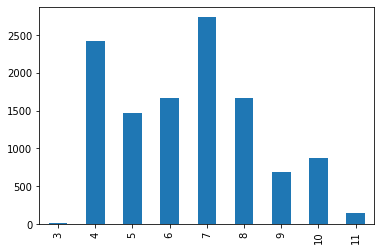

In [20]:
covid19['month_opened'].value_counts().sort_index().plot(kind="bar");

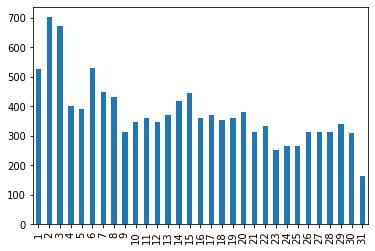

In [21]:
covid19['day_opened'].value_counts().sort_index().plot(kind="bar");

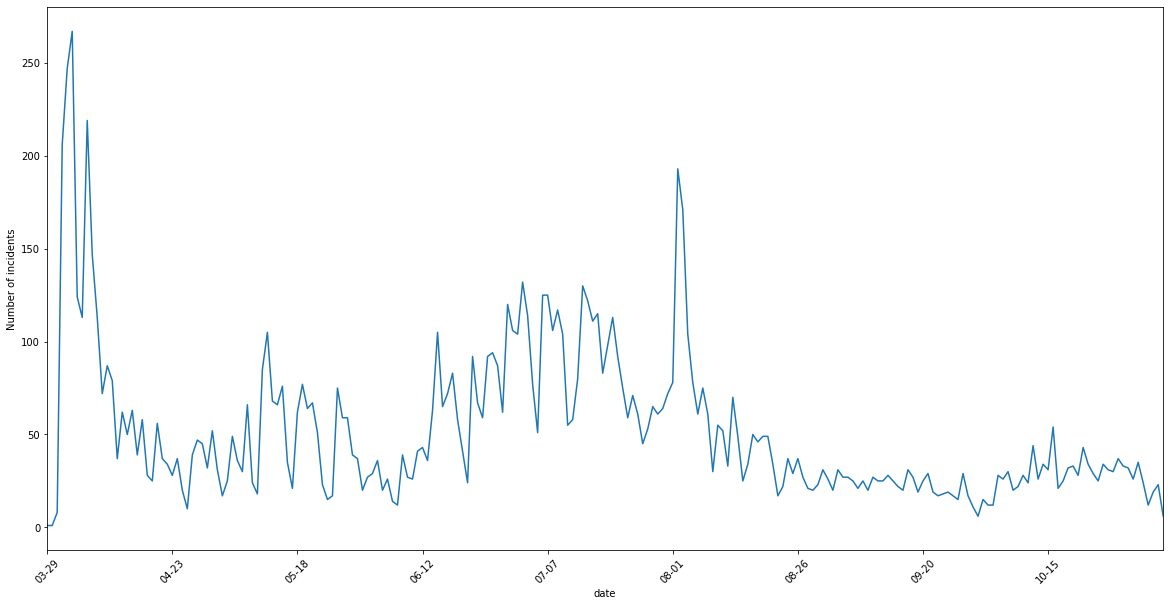

In [49]:
ax= covid19['month_day_opened'].value_counts().sort_index().plot(rot=45, figsize=(20, 10))

ax.set_xlabel("date")
ax.set_ylabel("Number of incidents");

In [ ]:
#covid19['log'] = gdp_and_internet_use_2014['GDP_Per_Capita'].apply(np.log)

### Convert the location into a geodata point

In [ ]:
#import geopandas as gpd
#covid19 = gpd.GeoDataFrame(
#            covid19, geometry=gpd.points_from_xy(covid19.longitude, covid19.latitude))

## Part2: file davidson_cases.csv

### The file davidson_cases.csv contains the number of COVID cases in Davidson county per day from March 8 through October 29. Use this dataset to compare the trend for the number of cases over time to the number of reported violations. Feel free to add any additional data that you think might be useful.

In [23]:
davidson_cases = pd.read_csv("../data/davidson_cases.csv")
davidson_cases.head()

,date,county,state,fips,cases,deaths
0,2020-03-08,Davidson,Tennessee,47037,1,0
1,2020-03-09,Davidson,Tennessee,47037,1,0
2,2020-03-10,Davidson,Tennessee,47037,1,0
3,2020-03-11,Davidson,Tennessee,47037,2,0
4,2020-03-12,Davidson,Tennessee,47037,6,0


In [24]:
# Converting the original date column from string to datetime
davidson_cases["date"] = davidson_cases["date"].astype("datetime64")

davidson_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 6 columns):
date      235 non-null datetime64[ns]
county    235 non-null object
state     235 non-null object
fips      235 non-null int64
cases     235 non-null int64
deaths    235 non-null int64
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 11.1+ KB


In [32]:
davidson_cases['month'] = davidson_cases['date'].dt.month
davidson_cases['day'] = davidson_cases['date'].dt.day

davidson_cases.head()

,date,county,state,fips,cases,deaths,month,day,time
0,2020-03-08,Davidson,Tennessee,47037,1,0,3,8,00:00:00
1,2020-03-09,Davidson,Tennessee,47037,1,0,3,9,00:00:00
2,2020-03-10,Davidson,Tennessee,47037,1,0,3,10,00:00:00
3,2020-03-11,Davidson,Tennessee,47037,2,0,3,11,00:00:00
4,2020-03-12,Davidson,Tennessee,47037,6,0,3,12,00:00:00


In [33]:
davidson_cases["month_day"] = davidson_cases['date'].dt.strftime('%m-%d')
davidson_cases.head()

,date,county,state,fips,cases,deaths,month,day,time,month_day
0,2020-03-08,Davidson,Tennessee,47037,1,0,3,8,00:00:00,03-08
1,2020-03-09,Davidson,Tennessee,47037,1,0,3,9,00:00:00,03-09
2,2020-03-10,Davidson,Tennessee,47037,1,0,3,10,00:00:00,03-10
3,2020-03-11,Davidson,Tennessee,47037,2,0,3,11,00:00:00,03-11
4,2020-03-12,Davidson,Tennessee,47037,6,0,3,12,00:00:00,03-12


In [63]:
violations_by_day = covid19.groupby('month_day_opened').size().to_frame('count')

In [64]:
violations_by_day

,count
month_day_opened,
03-29,1
03-30,1
03-31,8
04-01,206
04-02,247
04-03,267
04-04,124
04-05,113
04-06,219


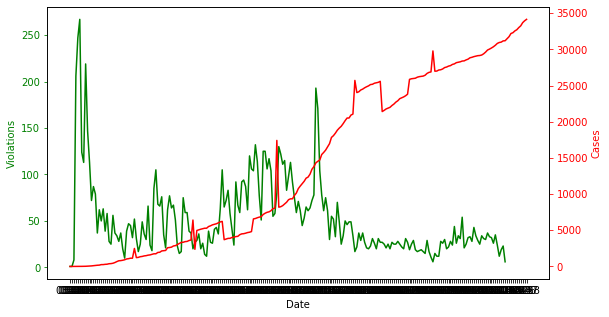

In [77]:
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(violations_by_day.index, violations_by_day['count'], 
           color='green')
ax.set_xlabel('Date')
ax.set_ylabel('Violations', color='green')
ax.tick_params('y', colors='green')
ax2 = ax.twinx()
ax2.plot(davidson_cases['month_day'], davidson_cases['cases'],          
         color='red')
ax2.set_ylabel('Cases', color='red')
ax2.tick_params('y', colors='red');

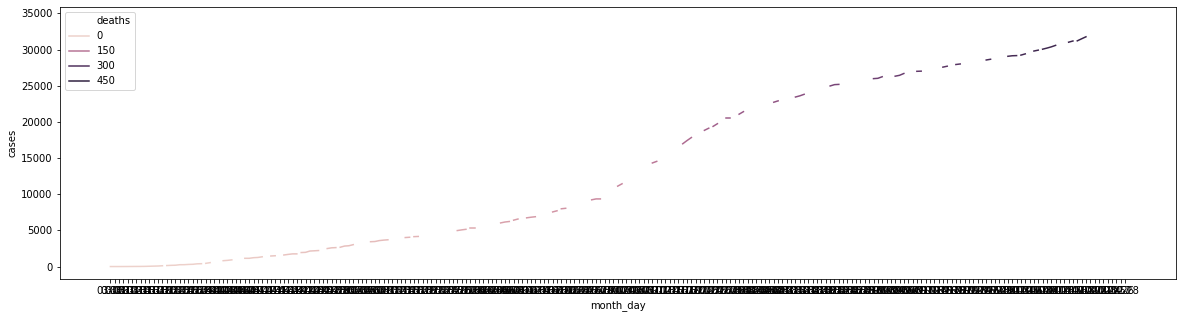

In [55]:
plt.figure(figsize=(20,5))
sns.lineplot(data= davidson_cases,x ="month_day",y="cases", hue="deaths");

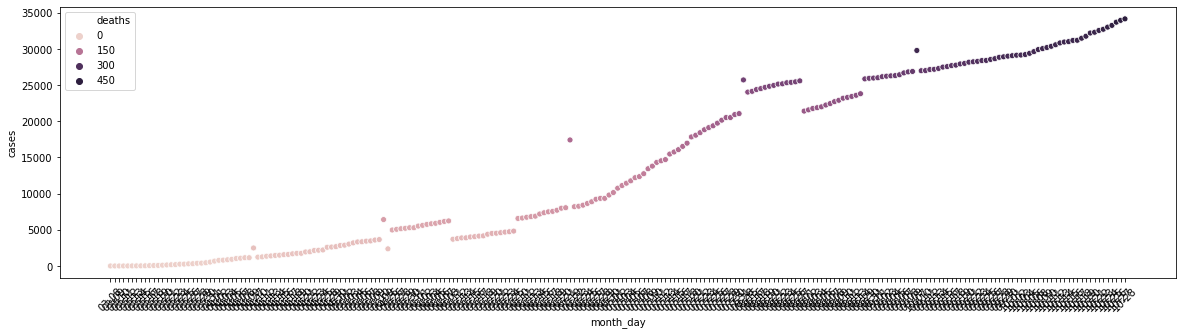

In [61]:
plt.figure(figsize=(20,5))
sns.scatterplot(data= davidson_cases,x ="month_day",y="cases", hue="deaths")
plt.xticks(rotation = 45);

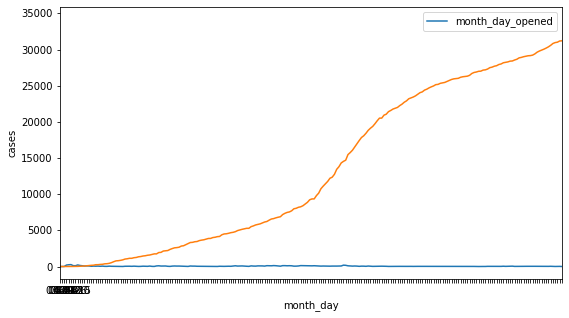

In [73]:
plt.figure(figsize=(9,5))

covid19['month_day_opened'].value_counts().sort_index().plot()

sns.lineplot(data= davidson_cases,x ="month_day",y="cases");

## Part3: The Metro Public Health Department tracks COVID-19 clusters.

### The files 'clusters.csv' and 'clusters_by_type.csv' contain the tables of clusters as reported by [WSMV](https://www.wsmv.com/news/metro-health-releases-latest-covid-19-clusters/article_ef554e08-1558-11eb-b290-873345e174d7.html) along with the coordinates of the clusters. Can you find any connection between the reported COVID violations and subsequent COVID clusters?

In [84]:
cluster_by_type = pd.read_csv("../data/clusters_by_type.csv")
                              
cluster_by_type.head()

,Cluster Type,Number of Clusters
0,Bar,7
1,Church,2
2,College / University,5
3,Commercial-Warehouse,12
4,Congregate Living,13


In [85]:
cluster_by_type["Cluster Type"].unique()

array(['Bar', 'Church', 'College / University', 'Commercial-Warehouse',
       'Congregate Living', 'Construction', 'Correctional Facility',
       'Day Care', 'Food Production', 'Grocery', 'Gym',
       'Healthcare, non-LTCF', 'LTCF', 'Office', 'Other', 'Restaurant',
       'School', 'Social Gathering'], dtype=object)

In [78]:
cluster = pd.read_csv("../data/clusters.csv")
cluster.head()

,Cluster Name,Facility Type,Cluster Start Date,# Cases,Latitude,Longitude
0,Vanderbilt Parties,Social Gathering,3/11/2020,49,36.125891,-86.822863
1,Event at Clementine Hall,Social Gathering,3/14/2020,23,36.152444,-86.8467716
2,Religious Retreat,Social Gathering,3/25/2020,18,NaN,NaN
3,The Health Center at Richland Place,LTCF,4/3/2020,47,36.128750,-86.8195333
4,Trevecca Center for Rehab and Healing,LTCF,4/4/2020,102,36.144562,-86.7567485


In [89]:
cluster["Longitude"].max()

TypeError: '>=' not supported between instances of 'str' and 'float'

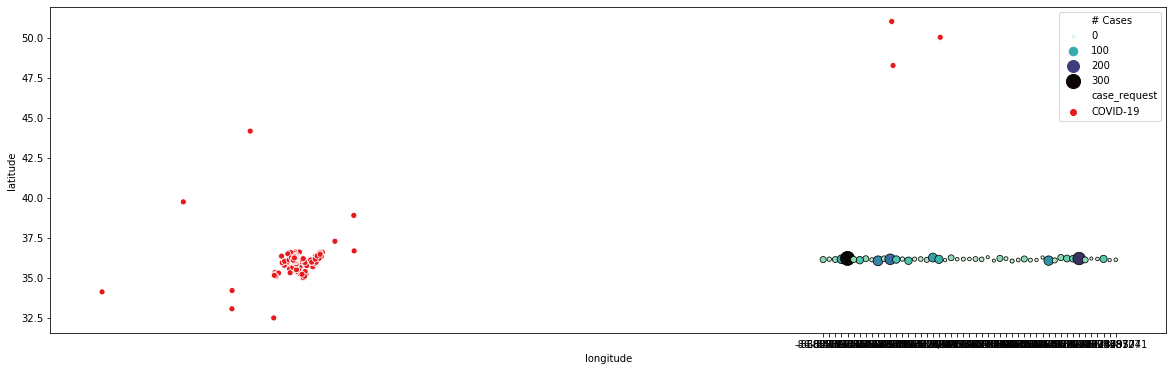

In [82]:
plt.figure(figsize = (20,6))

sns.scatterplot(data=cluster, x="Longitude", y="Latitude", hue="# Cases", palette="mako_r", size="# Cases", sizes=(10, 200), edgecolor = 'black')

sns.scatterplot(data=covid19, x="longitude", y="latitude", hue="case_request",palette="Set1");

,Cluster Type,Number of Clusters
0,Bar,7
1,Church,2
2,College / University,5
3,Commercial-Warehouse,12
4,Congregate Living,13


In [ ]:
plt.figure(figsize = (20,6))

sns.scatterplot(data=cluster, x="Longitude", y="Latitude", hue="# Cases", palette="mako_r", size="# Cases", sizes=(10, 200), edgecolor = 'black')

sns.scatterplot(data=covid19, x="longitude", y="latitude", hue="case_request",palette="Set1");